<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

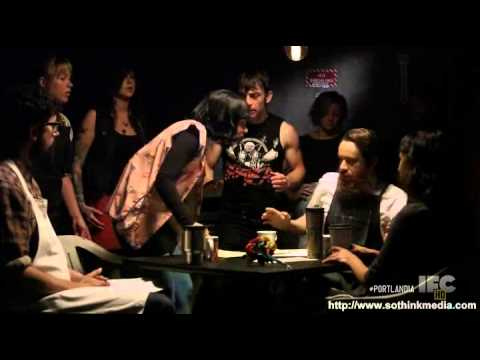

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'C:\\Users\\reall\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import re

from collections import Counter
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load( 'en_core_web_lg')


url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

In [ ]:
print( shops.shape)
shops.head()

In [ ]:
# Start here 

In [6]:
shops[ 'star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [3]:
datePattern = (r'(\d+/\d+/\d+)')

# Regex experimenting: 
#shops[ 'review_date'] = re.match( datePattern, shops[ 'full_review_text'])
#re.search( datePattern, shops[ 'full_review_text'])
#shops[ 'full_review_text'].str[5:14]

# In order:
# Extract given regex string (the date), and assign it to new 'review_date' feature
shops[ 'review_date'] = shops[ 'full_review_text'].str.extract( datePattern)
# Remove date string from review text, since we have it already
shops[ 'full_review_text'] = shops[ 'full_review_text'].replace( r'(\d+/\d+/\d+\s*)', "", regex= True)
# Remove superfluous string data / words and 'float' mimesis, and change the left-over whole numbers to integers
shops[ 'star_rating'] = shops[ 'star_rating'].str[1].astype( int)


In [37]:
# Verification of above cell
print( shops[ 'review_date'][0], '\n')
print( shops[ 'star_rating'][0], '\n')
print( shops.dtypes, '\n')
shops.head()

11/25/2016 

5 

coffee_shop_name    object
full_review_text    object
star_rating          int32
review_date         object
tokens              object
dtype: object 



,coffee_shop_name,full_review_text,star_rating,review_date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [38]:
shops[ 'star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

### So there's only ~1500 'bad' reviews, compared to over 6,000 'good' reviews...

#### Ok then!

In [4]:
def tokentoke( text):
    # Method to tokenize given string data, 
    
    tokens = re.sub( r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [5]:
shops[ 'tokens'] = shops[ 'full_review_text'].apply( tokentoke)

In [189]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


In [19]:
wordCount = Counter()

shops[ 'tokens'].apply( lambda x: wordCount.update( x))

print( "Total words:", sum( wordCount.values()))
print( "Average words per review: {:.2f}".format( (sum( wordCount.values()) / len( shops[ 'tokens']))), "\nTop words:")
wordCount.most_common( 20)

Total words: 773910
Average words per review: 101.62 
Top words:


[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546),
 ('it', 9379),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426)]

### Well that seems massively unhelpful...

In [7]:
realToker = Tokenizer(nlp.vocab)

In [8]:
tokens = []

# Make tokens
for toke in realToker.pipe( shops[ 'full_review_text'], batch_size= 500):
    shopTokens = [token.text for token in toke]
    tokens.append( shopTokens)

# Be able to compare regex 'tokenizer' to NLP Tokenizer
shops2 = shops.copy()
shops2[ 'tokens'] = tokens

In [208]:
shops2.head()

,coffee_shop_name,full_review_text,star_rating,review_date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016,"[ , 1, check-in, Love, love, loved, the, atmos..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,12/2/2016,"[ , Listed, in, Date, Night:, Austin,, Ambianc..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016,"[ , 1, check-in, Listed, in, Brunch, Spots, I,..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016,"[ , Very, cool, decor!, Good, drinks, Nice, se..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,12/3/2016,"[ , 1, check-in, They, are, located, within, t..."


### Looking at the above, it's instantly clear that there's a difference between how the regex homebrew and NLP Tokenizer methods tokenize the same text. Interesting...

In [18]:
wordCount2 = Counter()

shops2[ 'tokens'].apply( lambda x: wordCount2.update( x))

print( "Total words:", sum( wordCount2.values()))
print( "Average words per review: {:.2f}".format( (sum( wordCount2.values()) / len( shops2[ 'tokens']))), "\nTop words:")
wordCount2.most_common( 20)

Total words: 801428
Average words per review: 105.23 
Top words:


[('the', 27779),
 ('and', 25748),
 (' ', 22606),
 ('a', 22085),
 ('I', 19780),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901),
 ('for', 8244),
 ('coffee', 7315),
 ('The', 6812),
 ('it', 6370),
 ('with', 6103),
 ('but', 5701),
 ('that', 5607),
 ('my', 5004),
 ('you', 4966),
 ('on', 4937)]

In [175]:
shops2[ 'tokens'].head()

0    [ , 1, check-in, Love, love, loved, the, atmos...
1    [ , Listed, in, Date, Night:, Austin,, Ambianc...
2    [ , 1, check-in, Listed, in, Brunch, Spots, I,...
3    [ , Very, cool, decor!, Good, drinks, Nice, se...
4    [ , 1, check-in, They, are, located, within, t...
Name: tokens, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


So if a 'good' coffee shop is one with a 4 or 5 star rating, and a bad is one with 3 or lower, then it should be pretty easy to just mask based on rating...

In [10]:
# Stratify based on rating, per tokenizing method

goodShops = shops[ shops[ 'star_rating'] > 3]    # 4 or 5 star
badShops = shops[ shops[ 'star_rating'] < 4]     # 3 or lower

goodShops2 = shops2[ shops2[ 'star_rating'] > 3]    # 4 or 5 star
badShops2 = shops2[ shops2[ 'star_rating'] < 4]     # 3 or lower

In [11]:
# Let's try something new: word clouds (of which there will be a lot)

from wordcloud import WordCloud, STOPWORDS

goodComments = ''

for goodTokens in goodShops.tokens:
    for goodWords in goodTokens:
        goodComments = goodComments + goodWords + ' '


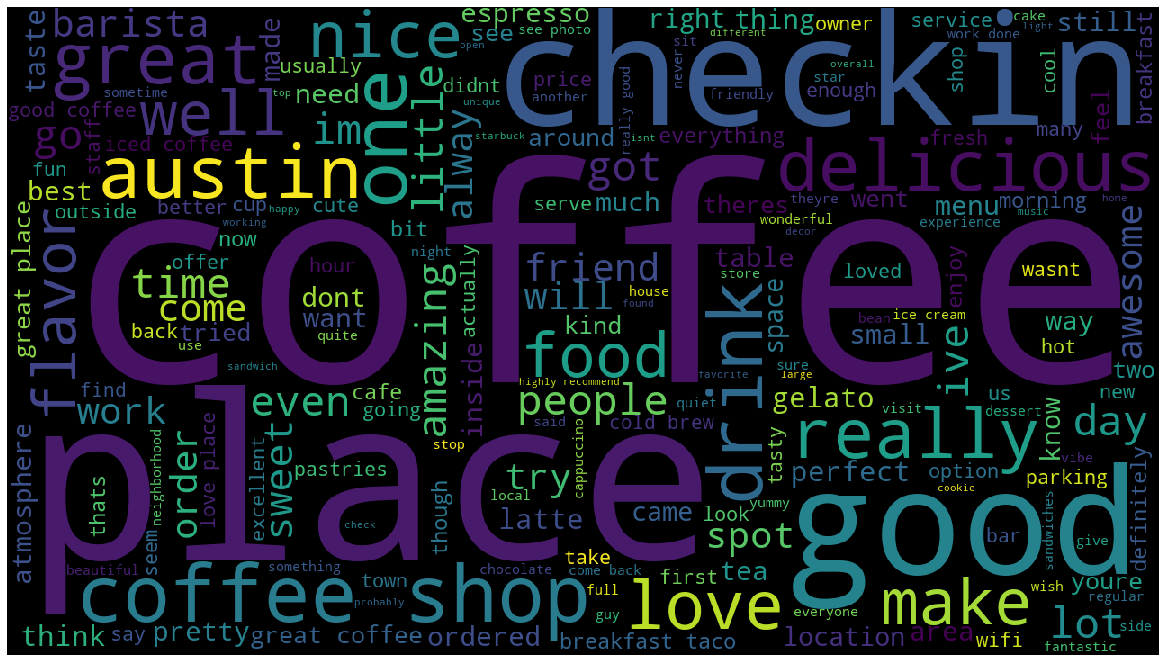

In [29]:
goodCloud = WordCloud( width = 1280, height = 720,
                    stopwords= set(STOPWORDS)).generate( goodComments)
plt.figure( figsize= (16, 9))
plt.imshow( goodCloud)
plt.axis( "off")
plt.tight_layout( pad= 0)
plt.show();

In [30]:
goodComments2 = ''

for goodTokens2 in goodShops2.tokens:
    for goodWords2 in goodTokens2:
        goodComments2 = goodComments2 + goodWords2 + ' '


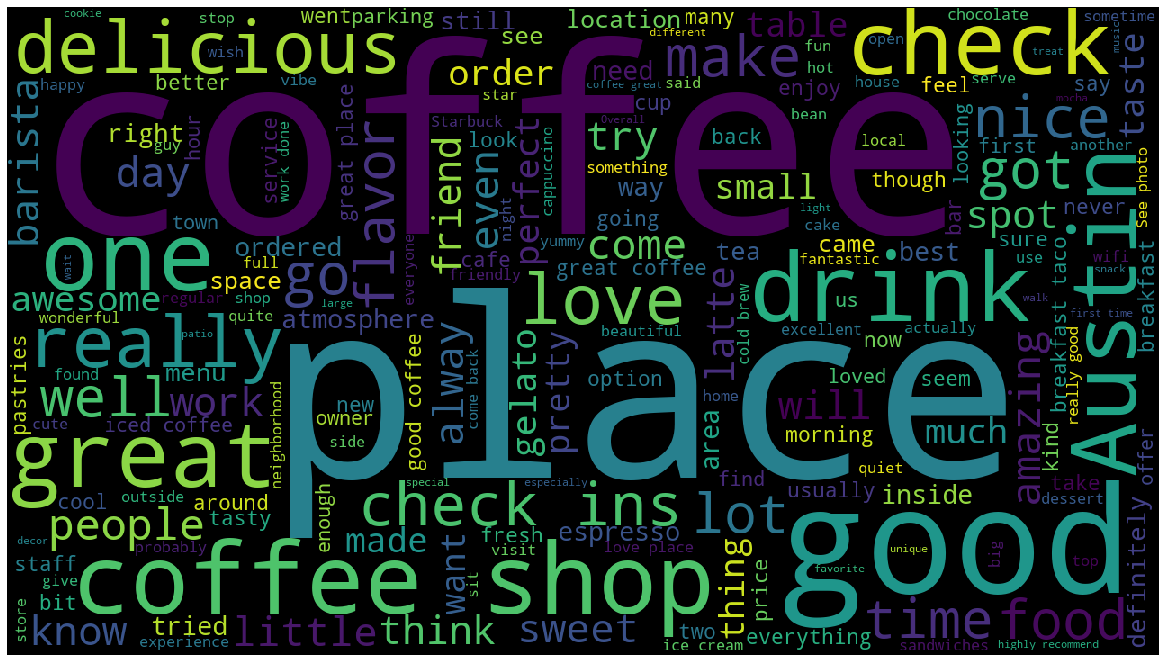

In [31]:
goodCloud2 = WordCloud( width = 1280, height = 720,
                    stopwords= set(STOPWORDS)).generate( goodComments2)
plt.figure( figsize= (16, 9))
plt.imshow( goodCloud2)
plt.axis( "off")
plt.tight_layout( pad= 0)
plt.show();

In [32]:
badComments = ''

for badTokens in badShops.tokens:
    for badWords in badTokens:
        badComments = badComments + badWords + ' '


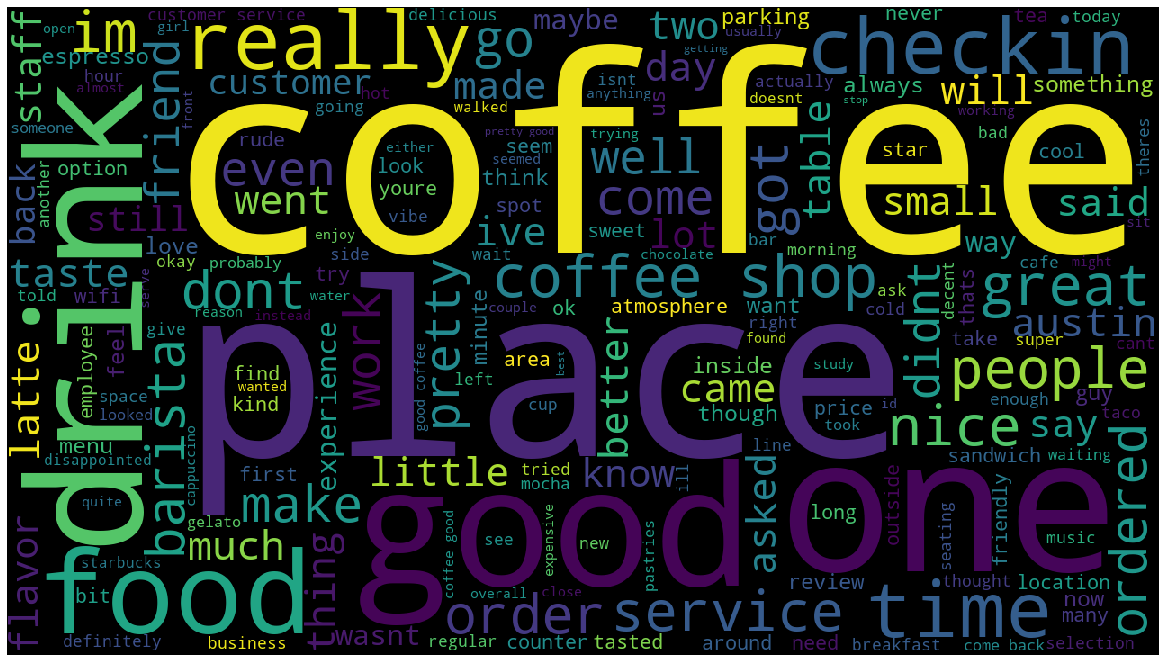

In [33]:
badCloud = WordCloud( width = 1280, height = 720,
                    stopwords= set(STOPWORDS)).generate( badComments)
plt.figure( figsize= (16, 9))
plt.imshow( badCloud)
plt.axis( "off")
plt.tight_layout( pad= 0)
plt.show();

In [34]:
badComments2 = ''

for badTokens2 in badShops2.tokens:
    for badWords2 in badTokens2:
        badComments2 = badComments2 + badWords2 + ' '


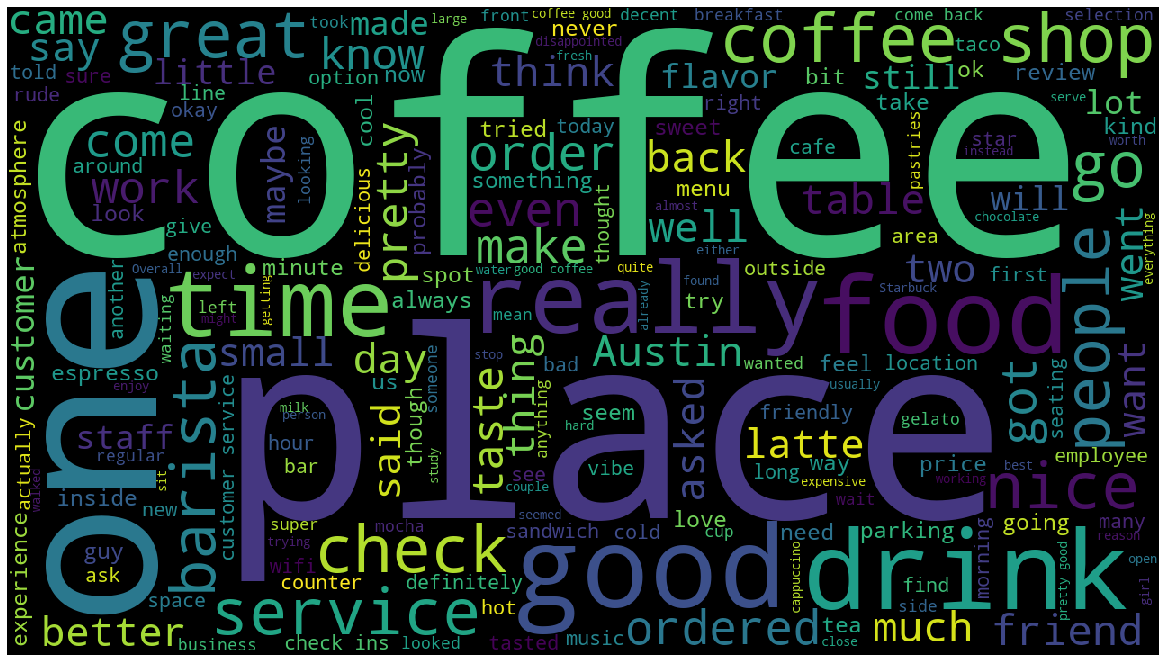

In [35]:
badCloud2 = WordCloud( width = 1280, height = 720,
                    stopwords= set(STOPWORDS)).generate( badComments2)
plt.figure( figsize= (16, 9))
plt.imshow( badCloud2)
plt.axis( "off")
plt.tight_layout( pad= 0)
plt.show();

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

